<script>
  jQuery(document).ready(function($) {

  $(window).load(function(){
    $('#preloader').fadeOut('slow',function(){$(this).remove();});
  });

  });
</script>

<style type="text/css">
  div#preloader { position: fixed;
      left: 0;
      top: 0;
      z-index: 999;
      width: 100%;
      height: 100%;
      overflow: visible;
      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center;
  }

</style>

<div id="preloader"></div>

In [1]:
#上面markdown：设置加载缓冲条
#隐藏alert
import warnings
warnings.simplefilter('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:130% !important; font-size:13px;line-height:1;text-align:left;box-sizing:15;} </style>"))

In [2]:
import pandas as pd
import numpy as np  
import csv
import math
import matplotlib.pyplot as plt
import datetime
import scipy.stats 
from scipy import stats
import re
import csv
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='data/Songti.ttc')
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
#di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

In [3]:
import sys,os,argparse
from IPython.display import HTML
CONFIG_FILE = '.config_ipynb'
p = ""
if os.path.isfile(CONFIG_FILE):
    with open(CONFIG_FILE) as f:
        p = f.readline()
fundname=p
#fundname='输入基金名称'
ctaname='20亿私募股票指数'
benchname='沪深300'

In [4]:
data=pd.read_csv('data/stock/%s.csv'%fundname,encoding="utf-8",index_col="净值时间")
data.index=pd.to_datetime(data.index)
data=data.sort_values(by='净值时间',ascending=False)
benchmark=pd.read_csv('data/index/399300.csv',encoding='gbk').iloc[:,[0,3]]
benchmark.columns=['净值时间','close']
benchmark=benchmark.set_index('净值时间')
benchmark.index=pd.to_datetime(benchmark.index)
data["收益率"] =(data["单位净值"]-data["单位净值"].shift(-1))/data["单位净值"].shift(-1)
data=data[::-1]
benchmark['bret'] = (benchmark['close'] - benchmark['close'].shift(1))/benchmark['close'].shift(1)
benchmark = benchmark.dropna()

In [5]:
datad=data.iloc[:,0:1]
cta5=pd.read_csv('data/index/5亿私募CTA指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta10=pd.read_csv('data/index/十亿私募对冲指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta20=pd.read_csv('data/index/20亿私募股票指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta100=pd.read_csv('data/index/百亿私募指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta5.columns=['净值时间','5亿私募CTA指数']
cta5=cta5.set_index('净值时间')
cta10.columns=['净值时间','10亿私募对冲指数']
cta10=cta10.set_index('净值时间')
cta20.columns=['净值时间','20亿私募股票指数']
cta20=cta20.set_index('净值时间')
cta100.columns=['净值时间','百亿私募混合指数']
cta100=cta100.set_index('净值时间')

cta5.index=pd.to_datetime(cta5.index)
cta10.index=pd.to_datetime(cta10.index)
cta20.index=pd.to_datetime(cta20.index)
cta100.index=pd.to_datetime(cta100.index)
cta5=cta5.groupby(pd.Grouper(freq="D")).sum()
cta10=cta10.groupby(pd.Grouper(freq="D")).sum()
cta20=cta20.groupby(pd.Grouper(freq="D")).sum()
cta100=cta100.groupby(pd.Grouper(freq="D")).sum()
for i in np.arange(len(cta5)):
    xx=cta5.index[i]
    cta5['5亿私募CTA指数'][i]=cta5[(cta5.index>=xx)&(cta5['5亿私募CTA指数']!=0.)]['5亿私募CTA指数'][0] 
for i in np.arange(len(cta10)):
    xx=cta10.index[i]
    cta10['10亿私募对冲指数'][i]=cta10[(cta10.index>=xx)&(cta10['10亿私募对冲指数']!=0.)]['10亿私募对冲指数'][0] 
for i in np.arange(len(cta20)):
    xx=cta20.index[i]
    cta20['20亿私募股票指数'][i]=cta20[(cta20.index>=xx)&(cta20['20亿私募股票指数']!=0.)]['20亿私募股票指数'][0] 
for i in np.arange(len(cta100)):
    xx=cta100.index[i]
    cta100['百亿私募混合指数'][i]=cta100[(cta100.index>=xx)&(cta100['百亿私募混合指数']!=0.)]['百亿私募混合指数'][0] 
data100=pd.merge(datad.reset_index(),cta5.reset_index(),how='left').set_index("净值时间")
data5=pd.merge(data100.reset_index(),cta10.reset_index(),how='left').set_index("净值时间")
data10=pd.merge(data5.reset_index(),cta20.reset_index(),how='left').set_index("净值时间")
data11=pd.merge(data10.reset_index(),cta100.reset_index(),how='left').set_index("净值时间")

data11['cta5收益率']=((data11["5亿私募CTA指数"].shift(-1)-data11["5亿私募CTA指数"])/data11["5亿私募CTA指数"]).shift(1)
data11['cta10收益率']=((data11["10亿私募对冲指数"].shift(-1)-data11["10亿私募对冲指数"])/data11["10亿私募对冲指数"]).shift(1)
data11['cta20收益率']=((data11["20亿私募股票指数"].shift(-1)-data11["20亿私募股票指数"])/data11["20亿私募股票指数"]).shift(1)
data11['cta100收益率']=((data11["百亿私募混合指数"].shift(-1)-data11["百亿私募混合指数"])/data11["百亿私募混合指数"]).shift(1)
data11=data11.dropna()

# 基金分析报告

In [6]:
data1=pd.merge(data.reset_index(),benchmark.reset_index()).set_index("净值时间")
data1["bret"] =((data1["close"].shift(-1)-data1["close"])/data1["close"]).shift(1)

#data1=pd.merge(data1.reset_index(),cta10.reset_index()).set_index("净值时间")
#data1['hret']=(data1["10亿私募对冲指数"].shift(-1)-data1["10亿私募对冲指数"])/data1["10亿私募对冲指数"]
datasum1 = pd.merge(data.reset_index(),benchmark.reset_index()).set_index("净值时间").dropna()
dd=[]
#基金总体表现
datasum1_bennega = datasum1   
dd.append(pd.DataFrame([ ('%.2f%%' % (100 * round(datasum1_bennega["收益率"].mean(),4))),('%.2f%%' % (100 * round(datasum1_bennega["收益率"].std()*math.sqrt(52),4))),round(math.sqrt(52)*(datasum1_bennega["收益率"]).mean()/((datasum1_bennega["收益率"]).std()),2), ('%.2f%%' % (100*len(datasum1_bennega[datasum1_bennega["收益率"]>0])/len(datasum1_bennega))) , round(np.corrcoef(datasum1_bennega["收益率"],datasum1_bennega["bret"])[0,1],2)], index = ['平均收益率','年化收益率的波动率','年化夏普率','胜率','和大盘相关系数'], columns = ["总体"]))

#大盘回报为负时基金表现
datasum1_bennega = datasum1[datasum1["bret"] < 0]
if ((datasum1_bennega.empty==False) & (datasum1_bennega["收益率"].std()!=0)):
    dd.append(pd.DataFrame([ ('%.2f%%' % (100 * round(datasum1_bennega["收益率"].mean(),4))),('%.2f%%' % (100 * round(datasum1_bennega["收益率"].std()*math.sqrt(52),4))),round(math.sqrt(52)*(datasum1_bennega["收益率"]).mean()/((datasum1_bennega["收益率"]).std()),2), ('%.2f%%' % (100*len(datasum1_bennega[datasum1_bennega["收益率"]>0])/len(datasum1_bennega))) , round(np.corrcoef(datasum1_bennega["收益率"],datasum1_bennega["bret"])[0,1],2)], index = ['平均收益率','年化收益率的波动率','年化夏普率','胜率','和大盘相关系数'], columns = ["大盘为负"]))

#2015大跌
datasum1_bennega =datasum1[(datasum1.index > '2015-06-12') & (datasum1.index < '2015-08-02')]
if ((datasum1_bennega.empty==False) & (datasum1_bennega["收益率"].std()!=0)):
    dd.append(pd.DataFrame([ ('%.2f%%' % (100 * round(datasum1_bennega["收益率"].mean(),4))),('%.2f%%' % (100 * round(datasum1_bennega["收益率"].std()*math.sqrt(52),4))),round(math.sqrt(52)*(datasum1_bennega["收益率"]).mean()/((datasum1_bennega["收益率"]).std()),2), ('%.2f%%' % (100*len(datasum1_bennega[datasum1_bennega["收益率"]>0])/len(datasum1_bennega))) , round(np.corrcoef(datasum1_bennega["收益率"],datasum1_bennega["bret"])[0,1],2)], index = ['平均收益率','年化收益率的波动率','年化夏普率','胜率','和大盘相关系数'], columns = ["大跌(150612-150802)"]))

#2014年底
#datasum1_bennega =datasum1[(datasum1.index > '2014-11-20') & (datasum1.index < '2015-01-04')]
#if ((datasum1_bennega.empty==False) & (datasum1_bennega["收益率"].std()!=0)):
    #dd.append(pd.DataFrame([ ('%.2f%%' % (100 * round(datasum1_bennega["收益率"].mean(),4))),('%.2f%%' % (100 * round(datasum1_bennega["收益率"].std()*math.sqrt(52),4))),round(math.sqrt(52)*(datasum1_bennega["收益率"]).mean()/((datasum1_bennega["收益率"]).std()),2), ('%.2f%%' % (100*len(datasum1_bennega[datasum1_bennega["收益率"]>0])/len(datasum1_bennega))) , round(np.corrcoef(datasum1_bennega["收益率"],datasum1_bennega["bret"])[0,1],2)], index = ['平均收益率','年化收益率的波动率','年化夏普率','胜率','和大盘相关系数'], columns = ["2014年底"]))

#熔断机制
datasum1_bennega =datasum1[(datasum1.index > '2016-01-03') & (datasum1.index < '2016-01-18')]
if ((datasum1_bennega.empty==False) & (datasum1_bennega["收益率"].std()!=0)):
      dd.append(pd.DataFrame([ ('%.2f%%' % (100 * round(datasum1_bennega["收益率"].mean(),4))),('%.2f%%' % (100 * round(datasum1_bennega["收益率"].std()*math.sqrt(52),4))),round(math.sqrt(52)*(datasum1_bennega["收益率"]).mean()/((datasum1_bennega["收益率"]).std()),2), ('%.2f%%' % (100*len(datasum1_bennega[datasum1_bennega["收益率"]>0])/len(datasum1_bennega))) , round(np.corrcoef(datasum1_bennega["收益率"],datasum1_bennega["bret"])[0,1],2)], index = ['平均收益率','年化收益率的波动率','年化夏普率','胜率','和大盘相关系数'], columns = ["熔断(160103-160228)"]))

#雄安新区建立
datasum1_bennega =datasum1[(datasum1.index > '2017-04-01') & (datasum1.index < '2017-06-01')]
if ((datasum1_bennega.empty==False) & (datasum1_bennega["收益率"].std()!=0)):
      dd.append(pd.DataFrame([ ('%.2f%%' % (100 * round(datasum1_bennega["收益率"].mean(),4))),('%.2f%%' % (100 * round(datasum1_bennega["收益率"].std()*math.sqrt(52),4))),round(math.sqrt(52)*(datasum1_bennega["收益率"]).mean()/((datasum1_bennega["收益率"]).std()),2), ('%.2f%%' % (100*len(datasum1_bennega[datasum1_bennega["收益率"]>0])/len(datasum1_bennega))) , round(np.corrcoef(datasum1_bennega["收益率"],datasum1_bennega["bret"])[0,1],2)], index = ['平均收益率','年化收益率的波动率','年化夏普率','胜率','和大盘相关系数'], columns = ["雄安(170401-170601)"]))
#用条件语句
#zt=pd.merge(pd.merge(pd.merge(pd.merge(a.reset_index(),b.reset_index()),c.reset_index()),e.reset_index()),f.reset_index())
zt=pd.merge(dd[0].reset_index(),dd[1].reset_index())
for i in range(2,len(dd)):
    zt=pd.merge(zt,dd[i].reset_index())
zt.index=['','','','','']
zt.rename(columns={'index':' '}, inplace = True)
#zt=zt.fillna(0)
print( "\033[1m%s表现" %fundname)
zt.dropna(axis=1)

鑫兰瑞表现


,,总体,大盘为负,大跌(150612-150802),雄安(170401-170601)
,平均收益率,0.70%,0.98%,6.57%,-0.48%
,年化收益率的波动率,23.53%,26.55%,31.69%,5.64%
,年化夏普率,1.54,1.91,10.78,-4.43
,胜率,48.96%,49.64%,75.00%,50.00%
,和大盘相关系数,-0.05,-0.06,-0.28,0.31


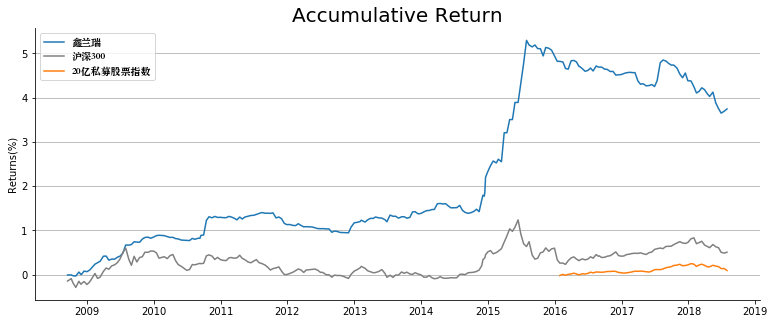

In [7]:
#累计收益曲线
plt.figure(figsize=(13,5)) 
data1=data1.dropna()
data1['benchmark']=(1+data1["bret"]).cumprod()-1
data1['local']=(1+data1["收益率"]).cumprod()-1
if (ctaname=='5亿私募CTA指数'):
    data1['cta']=(1+data11["cta%d收益率"%int(ctaname[0])]).cumprod()-1
if (ctaname=='10亿私募对冲指数'):
    data1['cta']=(1+data11["cta%d收益率"%int(ctaname[0:2])]).cumprod()-1
if (ctaname=='20亿私募股票指数'):
    data1['cta']=(1+data11["cta%d收益率"%int(ctaname[0:2])]).cumprod()-1
if (ctaname=='百亿私募混合指数'):
    data1['cta']=(1+data11["cta%d收益率"%int(ctaname[0:3])]).cumprod()-1

plt.plot(((data1['local'])),label=fundname)
plt.plot(((data1['benchmark'])),label=benchname,color='grey')
plt.plot(((data1['cta'])),label='%s'%ctaname)

plt.xticks()
plt.yticks()
plt.legend(prop=font,fontsize = 10)
plt.grid(axis='y')
plt.xlabel('')
plt.ylabel('Returns(%)',)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.title('Accumulative Return',fontsize=20)

plt.show()

In [8]:
cta=pd.DataFrame(data11[ctaname])
mdata=data.groupby(pd.Grouper(freq="M")).last()
mdata['ret']=(mdata["单位净值"]-mdata["单位净值"].shift(1))/mdata["单位净值"].shift(1)
mdata['monthly returns(%)']=round(mdata['ret']*100,2)
mdata=mdata.reset_index()
mdata['year']=pd.to_datetime(mdata['净值时间']).dt.year
mdata['month']=pd.to_datetime(mdata['净值时间']).dt.month

mbdata=benchmark.groupby(pd.Grouper(freq="M")).last()
mbdata['bret']=(mbdata["close"]-mbdata["close"].shift(1))/mbdata["close"].shift(1)
mbdata['monthly returns(%)']=round(mbdata['bret']*100,2)
mbdata=mbdata.reset_index()
mbdata['year']=pd.to_datetime(mbdata['净值时间']).dt.year
mbdata['month']=pd.to_datetime(mbdata['净值时间']).dt.month

if (ctaname=='5亿私募CTA指数'):
    cta=cta5
if (ctaname=='10亿私募对冲指数'):
    cta=cta10
if (ctaname=='20亿私募股票指数'):
    cta=cta20
if (ctaname=='百亿私募混合指数'):
    cta=cta100
mcdata=cta.groupby(pd.Grouper(freq="M")).last()
mcdata['cret']=(mcdata[ctaname]-mcdata[ctaname].shift(1))/mcdata[ctaname].shift(1)
mcdata['monthly returns(%)']=round(mcdata['cret']*100,2)
mcdata=mcdata.reset_index()
mcdata['year']=pd.to_datetime(mcdata['净值时间']).dt.year
mcdata['month']=pd.to_datetime(mcdata['净值时间']).dt.month

mmdata=pd.merge(mdata,mbdata,on=['year','month'])
mmdata=pd.merge(mmdata,mcdata,on=['year','month'])
mmtime=[str(mmdata['净值时间_x'].values[i])[0:7] for i in np.arange(len(mmdata))]

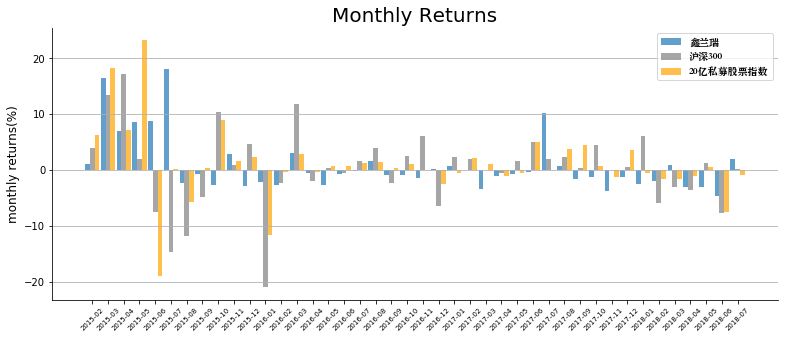

In [9]:
plt.figure(figsize=(13,5))
ind= np.arange(0,3*len(mmdata)-3,3)
plt.title('Monthly Returns',fontsize=20)
plt.bar(x=ind-0.9,height=mmdata['monthly returns(%)_x'].values[1:],width=0.9,alpha=0.7)
plt.bar(x=ind,height=mmdata['monthly returns(%)_y'].values[1:],width=0.9,alpha=0.7,color='gray')
plt.bar(x=ind+0.9,height=mmdata['monthly returns(%)'].values[1:],width=0.9,alpha=0.7,color='orange')
plt.legend(labels=[fundname,benchname,ctaname],prop=font,fontsize=13)
plt.grid(axis='y')
plt.ylabel('monthly returns(%)',fontsize=12)
plt.xticks(ind,mmtime[1:],rotation=45,fontsize=7)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.show()

In [10]:
#基金年收益
mdata=mdata
ydata=data.groupby(pd.Grouper(freq="A")).last()
ydata['ret']=(ydata["单位净值"]-ydata["单位净值"].shift(1))/ydata["单位净值"].shift(1)
a1=round(ydata['ret']*100,2)
for i in set(mdata['year']):
    t=mdata[mdata['year'] == i]
    if((len(t)<12)&(len(t)>1)&(np.isnan(t["单位净值"].values[0])==False)):
        a1[i-mdata['year'][0]] = round((t["单位净值"].values[-1]-t["单位净值"].values[0])/(t["单位净值"].values[0])*np.sqrt(12/(len(t)-1))*100,2)
    if((len(t)<12)&(len(t)>1)&(np.isnan(t["单位净值"].values[0])==True)):
        a1[i-mdata['year'][0]] = round((t["单位净值"].values[-1]-t["单位净值"].values[1])/(t["单位净值"].values[0])*np.sqrt(12/(len(t)-2))*100,2)
s=mdata.dropna().iloc[:,6:9].groupby(['year','month']).sum().unstack().fillna('')
if(np.isnan(a1[-len(s.index.values)])==True):
    t=mdata[mdata['year'] == mdata['year'][1]]
    a1[-len(s.index.values)]=round((t["单位净值"].values[-1]-t["单位净值"].values[0])/(t["单位净值"].values[0])*np.sqrt(12/(len(t)-1))*100,2)

#基金年夏普率
a2=np.zeros(len(set(mdata['year'])))
for i in set(mdata['year']):
    a2[i-mdata['year'][0]] = round(mdata[mdata['year'] == i]['monthly returns(%)'].mean()/mdata[mdata['year'] == i]['monthly returns(%)'].std()*np.sqrt(12),2)

**基金月收益率表(%)**

In [11]:
s=mdata.dropna().iloc[:,6:9].groupby(['year','month']).sum().unstack().fillna('')
ss=pd.DataFrame({'year\month':s.index.values,'年化夏普率':a2[-len(s.index.values):]}).set_index('year\month')
sss=pd.DataFrame({'year\month':s.index.values,'年化收益率(%)':a1[-len(s.index.values):]}).set_index('year\month')
slist=[]                                                         
n=len(s.columns)                         
for i in np.arange(n):
    slist.append(s.iloc[:,i].values)


m=pd.DataFrame({'%d'%(s.columns[i][1]):slist[i] for i in np.arange(n)})
m['year\month']=s.index.values
m=m.set_index('year\month')
mm=pd.concat([m,sss,ss],axis=1).reset_index()
mm.index=['' for _ in np.arange(len(mm))]
mm.fillna(' ')

,year\month,1,2,3,4,5,6,7,8,9,10,11,12,年化收益率(%),年化夏普率
,2008,,,,,,,,,10.24,-2.55,3.74,6.24,31.87,2.85
,2009,3.26,15.13,11.43,-6.29,3.47,5.08,17.58,0.62,3.38,3.9,2.36,0.18,75.90,2.60
,2010,2.11,-0.4,-2.18,-1.47,-1.8,-1.38,2.47,0.2,4.06,21.66,0.34,-0.86,22.74,1.01
,2011,-0.4,0.69,-2.82,0.88,2.77,0.88,1.74,0.31,-0.17,-4.32,-0.8,-5.91,-7.25,-0.81
,2012,-0.77,1.78,-3.26,0.23,-1.23,-1,-0.23,-3.74,1.02,-1.33,-0.27,11.55,1.99,0.20
,2013,1.18,-0.39,3.77,1.41,-1.06,-3.63,5.62,-1.85,1.45,-0.7,5.61,-1.59,9.77,0.96
,2014,2.63,0.99,5.38,-0.23,-1.77,-1.55,2.11,-6.13,-0.28,3.24,8.19,24.02,39.50,1.40
,2015,7.26,1.12,16.58,7.07,8.59,8.86,18.18,-2.34,-0.64,-2.71,2.93,-2.83,78.61,2.49
,2016,-2.09,-2.74,3.08,-0.46,-2.61,-0.74,-0.2,1.57,-0.82,-0.94,-1.45,0.22,-7.09,-1.24
,2017,0.72,0.07,-3.39,-1.14,-0.79,-0.42,10.23,0.66,-1.57,-1.23,-3.8,-1.23,-2.52,-0.15


In [18]:
data=data.dropna()
#1.计算整体数据VaR
##历史数据法
if(len(data)>=150):
    VaRhistory = sorted(data["收益率"][-150:])[1]
if(len(data)<150):
    VaRhistory = sorted(data["收益率"])[int(np.ceil(len(data)/100))-1]
##方差法
VaRnorm =data['收益率'][-150:].mean() - 2.33*data['收益率'][-150:].std()

cta=cta20
cta['ret']=(cta[ctaname]-cta[ctaname].shift(1))/cta[ctaname].shift(1)
cta.index=pd.to_datetime(cta.index)
cta=cta.dropna()
benchmark['bret'] = (benchmark['close'] - benchmark['close'].shift(-1))/benchmark['close'].shift(-1)
benchmark = benchmark.dropna()
from scipy import stats

res = stats.cumfreq(data['收益率'].values, numbins=len(data))
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,res.cumcount.size) 
F = res.cumcount/len(data)
Finv = 1-F
y = (sum(Finv) - np.cumsum(Finv))/np.cumsum(F)


res1 = stats.cumfreq(benchmark['bret'].values, numbins=len(benchmark))
x1 = res1.lowerlimit + np.linspace(0, res1.binsize*res1.cumcount.size,res1.cumcount.size) 
F1 = res1.cumcount/len(benchmark)
Finv1 = 1-F1
y1 = (sum(Finv1) - np.cumsum(Finv1))/np.cumsum(F1)

res2 = stats.cumfreq(cta['ret'].values, numbins=len(cta))
x2 = res2.lowerlimit + np.linspace(0, res2.binsize*res2.cumcount.size,res2.cumcount.size) 
F2 = res2.cumcount/len(cta)
Finv2 = 1-F2
y2 = (sum(Finv2) - np.cumsum(Finv2))/np.cumsum(F2)

omegadata = pd.DataFrame(y,x)
omegadata1 = pd.DataFrame(y1,x1)
omegadata2 = pd.DataFrame(y2,x2)

meanpdf = []
n = 100000
a = np.append(np.array(data1["收益率"].values*100),np.array(np.zeros(len(data))))
for i in np.arange(1,n):
    np.random.shuffle(a)
    meanpdf.append(np.mean(a[1:len(data1)]))

b = data['收益率'].values.mean()*100
pvalue = min([sum(meanpdf > b).max()/n,1-sum(meanpdf > b).max()/n])



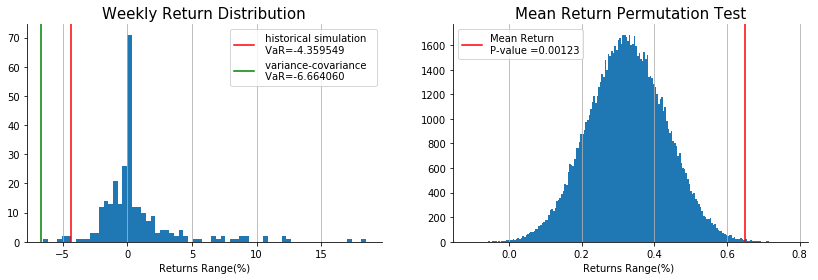

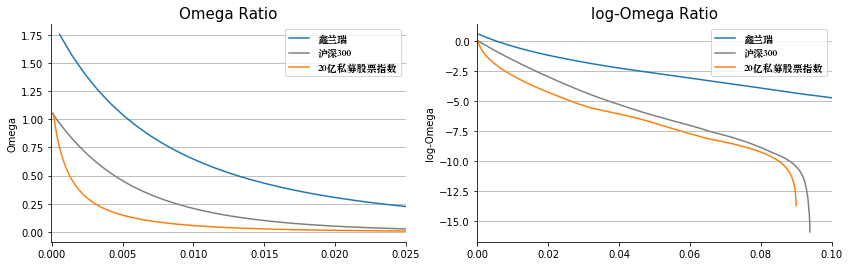

In [19]:

from matplotlib.font_manager import FontProperties
font = FontProperties(fname='data/Songti.ttc')
#收益分布图
plt.figure(figsize=(14,4)) 

plt.subplot(121)
plt.title('Weekly Return Distribution',fontsize=15)
plt.hist(data["收益率"]*100,bins=math.floor(len(data)/4))
freqrange = np.arange(0,40,0.1)
xpos = VaRhistory+0*freqrange
plt.axvline(VaRhistory*100,color = 'r',label = ' historical simulation  \n VaR=%f'%(VaRhistory*100))
plt.axvline(VaRnorm*100,color = 'g',label = ' variance-covariance \n VaR=%f'%(VaRnorm*100))
plt.grid(axis='x')
plt.xlabel('Returns Range(%)')
plt.xticks()
plt.yticks()
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

#2
plt.subplot(122)
plt.title('Mean Return Permutation Test',fontsize=15)
plt.hist(meanpdf,bins=200)
freqrange = np.arange(0,40,0.1)
#xpos = VaRhistory+0*freqrange
plt.axvline(data['收益率'].mean()*100,color = 'r',label = 'Mean Return \nP-value =' + str(round(pvalue,5)))
#plt.axvline(VaRnorm,color = 'g',label = ' variance-covariance VaR')
#plt.text(data['收益率'].mean()-0.00005,30,'P-value = ' + str(pvalue),fontsize = 14)
#plt.text(VaRnorm-0.007,30,round(VaRnorm,3),fontsize = 14)
plt.grid(axis='x')
plt.xlabel('Returns Range(%) ')
plt.xticks()
plt.yticks()
plt.legend()
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.figure(figsize=(14,4)) 
#3
plt.subplot(121)
plt.plot(((omegadata[(x>0)])))
plt.plot(((omegadata1[(x1>0)])),color='grey')
plt.plot(((omegadata2[(x2>0)])))
plt.xticks()
plt.yticks()
plt.xlim(-0.0001,0.025)
plt.legend([fundname,benchname,ctaname],prop=font)
plt.grid(axis='y')
plt.xlabel('')
plt.ylabel('Omega',)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.title('Omega Ratio',fontsize=15)


#4.og scale
plt.subplot(122)
from scipy import stats
plt.plot((np.log(omegadata[(x>0)])))
plt.plot((np.log(omegadata1[(x1>0)])),color='grey')
plt.plot((np.log(omegadata2[(x2>0)])))
plt.xticks()
plt.yticks()
plt.xlim(-0.0001,0.1)
plt.legend([fundname,benchname,ctaname],prop=font)
plt.grid(axis='y')
plt.xlabel('')
plt.ylabel('log-Omega',)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.title('log-Omega Ratio',fontsize=15)

plt.show()

In [ ]:
def rolling_5m_selfcorr(x,dat):
    rollcorr=list(x[0:20])
    for i in range(20,len(x)):
        rollcorr.append((np.cov(dat['收益率'][i-20:i],dat['收益率'][i-19:i+1])/np.var(dat['收益率'][i-19:i+1]))[0][1])
    return(rollcorr)
def rolling_1y_selfcorr(x,dat):
    rollcorr=list(x[0:52])
    for i in range(52,len(x)):
        rollcorr.append((np.cov(dat['收益率'][i-52:i],dat['收益率'][i-51:i+1])/np.var(dat['收益率'][i-51:i+1]))[0][1])
    return(rollcorr)

ret=data["单位净值"].values
def rolling_6m_mean(x):
    rollstd=list(x[1:27])
    for i in range(26,len(x)):
        rollstd.append(x[i-26:i].mean())
    return(rollstd)  

In [ ]:
ret=data["收益率"].values
rollselfcorr_5m=rolling_5m_selfcorr(ret,data)
rollselfcorr_1y=rolling_1y_selfcorr(ret,data)
data['selfcorr_5m']=rollselfcorr_5m
data['selfcorr_1y']=rollselfcorr_1y

In [ ]:
#return rank
if(len(data1)>=28):
    plt.figure(figsize=(14,4)) 
    plt.subplot(121)
    data1['srollmean']=rolling_6m_mean(data1['收益率'].values)
    data1['brollmean']=rolling_6m_mean(data1['bret'].values)
    data1['sp']=0.
    data1['bp']=0.
    for i in range(26,len(data1)):
        data1['sp'][i]=scipy.stats.percentileofscore(data1['srollmean'].values[26:],data1['srollmean'].values[i])
        data1['bp'][i]=scipy.stats.percentileofscore(data1['brollmean'].values[26:],data1['brollmean'].values[i])
    plt.scatter(data1.index[26:],data1['sp'].values[26:],marker='o',edgecolors='b',s=150,label=fundname)
    plt.scatter(data1.index[26:],data1['bp'].values[26:],marker='o',edgecolors='g',s=150,label=benchname)
    plt.title('Return-Rank',fontsize=15)
    yminorLocator = plt.MultipleLocator(25)
    plt.grid(axis='y')
    plt.ylabel('Percentile(%)')
    plt.xlabel('26 weeks moving windows,computed weekly')
    plt.legend(prop=font)
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_major_locator( yminorLocator )
    plt.subplot(122)
    plt.title('Lag-1 Rolling_AutoCorrelation',fontsize=15)
    if(len(ret)>52):
        data['selfcorr_5m'][20:].plot(label='5month')
        data['selfcorr_1y'][52:].plot(color='grey',label='1year')
        plt.legend()
        plt.xlabel('rolling-window autocorrelations of returns,computed weekly')
        plt.ylabel('autocorrelation')
        plt.ylim(-1,1)
        plt.grid(axis='y')
        ax = plt.gca()
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        plt.show()
    else:
        data['selfcorr_5m'][20:].plot(label='5month')
        plt.legend()
        plt.xlabel('rolling-window autocorrelations of returns,computed weekly')
        plt.ylabel('autocorrelation')
        plt.ylim(-1,1)
        plt.grid(axis='y')
        ax = plt.gca()
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        plt.show()
    
if(len(data1)<28):
    print('由于历史过短，无法生成 return-rank 和 一阶自相关系数图。')

In [ ]:
#回撤
#data1['value']=(1+data1["收益率"]).cumprod()
data1['D']=data1['单位净值'].cummax()-data1['单位净值']
#回撤率
data1['d']=data1['D']/(data1['单位净值'].cummax())
#data1['bvalue']=(1+data1["bret"]).cumprod()
data1['bD']=data1['close'].cummax()-data1['close']
#回撤率
data1['bd']=data1['bD']/(data1['close'].cummax())

In [ ]:
#drawdownplot
plt.figure(figsize=(13,5))
((data1['d'])*(-100)).plot()
((data1['bd'])*(-100)).plot(color='grey')
plt.grid(axis='y')
plt.xlabel('')
plt.legend([fundname,benchname],prop=font,fontsize=10,loc='lower left')
plt.ylabel('Drawdown(%)',fontsize=13)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax2 = ax.twinx()
data1['单位净值'].plot(label='netvalue',color='orange')
plt.ylabel('Net Price',fontsize=13)
plt.legend([fundname+'净值'],prop=font,fontsize=10,loc='lower right')
plt.title('Drawdown',fontsize=20)
plt.show()

In [ ]:
a=pd.DataFrame(data1['d'].sort_values(ascending=False))
a['回撤开始时间']=a.index
a['后最高点']=a.index
for i in np.arange(len(a)):
    dat=data1[:a.index[i]]
    a['回撤开始时间'][i]=dat[dat['单位净值'].cummax()==dat['单位净值']].index[-1]
for i in np.arange(len(a)):
    if(a[(a['回撤开始时间']>a.index[i]) & (a['d']!=0)].empty==False):
        a['后最高点'][i]=a[a['回撤开始时间']>a.index[i]].sort_values(by='回撤开始时间')['回撤开始时间'][0]
    else:a['后最高点'][i]=='无'

**最大回撤率前五名**

In [ ]:
#最大回撤率前五名
a1=a.reset_index().groupby('回撤开始时间').first().sort_values(by='d',ascending=False).iloc[0:5,:].reset_index()
aa=round(a1['d']*(-100),2).values
b=a1['回撤开始时间'].values
c=(a1['后最高点']-a1['净值时间']).values
d=a1['后最高点'].values
e=(a1['净值时间']-a1['回撤开始时间']).values
f=a1['净值时间'].values
for i in np.arange(len(a1)):
    if(f[i]==d[i]):
        d[i]=''
        c[i]=''
    if(f[i]==b[i]):
        j=i
        b=np.delete(b,range(j,len(a1)+1))
        d=np.delete(d,range(j,len(a1)+1))
        f=np.delete(f,range(j,len(a1)+1))
        aa=np.delete(aa,range(j,len(a1)+1))
        e=np.delete(e,range(j,len(a1)+1))
        c=np.delete(c,range(j,len(a1)+1))
        break;
drawdown_rank=pd.DataFrame({'净值时间':f,'回撤率(%)':aa,'前最高点':b,'前间隔时间':e,'后最高点':d,'后间隔时间':c})
drawdown_rank.index=np.arange(len(f))+1
drawdown_rank#.fillna('')

In [ ]:
risedays = []
plummetdays = []
i = 1
data2=data.reset_index().fillna(0)
while(i < len(data2)):
    if(data2["收益率"][i] >= 0):
        j = i
        while((data2["收益率"][j] >= 0)):
            if(j < len(data2)):
                j = j+1
            if(j==len(data2)):
                break
        risedays.append([data2['净值时间'][i-1],data2['净值时间'][j-1],((100*round((data2["复权净值"][j-1]-data2["复权净值"][i-1])/data2["复权净值"][i-1],4)))])
    if(data2["收益率"][i] < 0):
        j = i
        while((data2["收益率"][j] < 0)):
            if(j < len(data2)):
                j = j+1
            if(j==len(data2)):
                break
        plummetdays.append([data2['净值时间'][i-1],data2['净值时间'][j-1],((100*round((data2["复权净值"][j-1]-data2["复权净值"][i-1])/data2["复权净值"][i-1],4)))])
    i = j
risedays = pd.DataFrame(risedays)
risedays.columns = ["开始日期","结束日期","涨幅(%)"]
plummetdays = pd.DataFrame(plummetdays)
plummetdays.columns = ["开始日期","结束日期","跌幅(%)"]
risedays["持续时间"] = risedays["结束日期"] - risedays["开始日期"]
plummetdays["持续时间"] = plummetdays["结束日期"] - plummetdays["开始日期"]

## 收益连续涨跌幅

In [ ]:
#上涨持续时间前五名（并列）
print( "\033[1m%s" %"上涨持续时间前五名 vs 下跌持续时间前五名")
a1=risedays.sort_values(by=['持续时间'],ascending=False)[0:5]
a1.index=np.arange(len(a1))+1
#下跌持续时间前五名（并列）
a2=plummetdays.sort_values(by=['持续时间'],ascending=False)[0:5]
a2.index=np.arange(len(a2))+1
pd.concat([a1,a2],axis=1)

In [ ]:
#涨幅最高
print( "\033[1m%s" %"涨幅最大前五名 vs 跌幅最大前五名")
a1=risedays.sort_values(by=['涨幅(%)'],ascending=False)[0:5]
a1.index=np.arange(len(a1))+1
a2=plummetdays.sort_values(by=['跌幅(%)'],ascending=True)[0:5]
a2.index=np.arange(len(a2))+1
pd.concat([a1,a2],axis=1)

In [ ]:
##和对冲基金风格指数的相关矩阵
datasum2 = datasum1
namearray = ['5亿私募CTA指数','10亿私募对冲指数','20亿私募股票指数','百亿私募混合指数']

name='5亿私募CTA指数'
datapri1 = cta5.iloc[:,0:1]
datapri1 =datapri1.groupby(pd.Grouper(freq="D")).sum()
for i in np.arange(len(datapri1)):
    xx=datapri1.index[i]
    datapri1[name][i]=datapri1[(datapri1.index>=xx)&(datapri1[name]!=0.)][name][0] 
datasum2 = pd.merge(datasum2.reset_index(),datapri1.reset_index(),how='left').set_index("净值时间")
datasum2[name+"收益率"] = ((datasum2[name].shift(-1) - datasum2[name])/datasum2[name]).shift(1)

name='10亿私募对冲指数'
datapri1 = cta10.iloc[:,0:1]
datapri1 =datapri1.groupby(pd.Grouper(freq="D")).sum()
for i in np.arange(len(datapri1)):
    xx=datapri1.index[i]
    datapri1[name][i]=datapri1[(datapri1.index>=xx)&(datapri1[name]!=0.)][name][0] 
datasum2 = pd.merge(datasum2.reset_index(),datapri1.reset_index(),how='left').set_index("净值时间")
datasum2[name+"收益率"] = ((datasum2[name].shift(-1) - datasum2[name])/datasum2[name]).shift(1)

name='20亿私募股票指数'
datapri1 = cta20.iloc[:,0:1]
datapri1 =datapri1.groupby(pd.Grouper(freq="D")).sum()
for i in np.arange(len(datapri1)):
    xx=datapri1.index[i]
    datapri1[name][i]=datapri1[(datapri1.index>=xx)&(datapri1[name]!=0.)][name][0] 
datasum2 = pd.merge(datasum2.reset_index(),datapri1.reset_index(),how='left').set_index("净值时间")
datasum2[name+"收益率"] = ((datasum2[name].shift(-1) - datasum2[name])/datasum2[name]).shift(1)

name='百亿私募混合指数'
datapri1 = cta100.iloc[:,0:1]
datapri1 =datapri1.groupby(pd.Grouper(freq="D")).sum()
for i in np.arange(len(datapri1)):
    xx=datapri1.index[i]
    datapri1[name][i]=datapri1[(datapri1.index>=xx)&(datapri1[name]!=0.)][name][0] 
datasum2 = pd.merge(datasum2.reset_index(),datapri1.reset_index(),how='left').set_index("净值时间")
datasum2[name+"收益率"] = ((datasum2[name].shift(-1) - datasum2[name])/datasum2[name]).shift(1)

In [ ]:
##金锝1号和对冲基金风格指数的相关矩阵
print( "\033[1m%s" %"基金和对冲基金风格指数的相关系数矩阵")
datasum2_nega = datasum2[::-1]
round(pd.DataFrame({fundname:datasum2_nega["收益率"],benchname:datasum2_nega["bret"],'CTAIndex':datasum2_nega["5亿私募CTA指数收益率"],'HedgedIndex':datasum2_nega["10亿私募对冲指数收益率"],'StocksIndex':datasum2_nega["20亿私募股票指数收益率"],'MixedIndex':datasum2_nega["百亿私募混合指数收益率"]}).corr(),2)

In [ ]:
##当benchmark下跌时金锝1号和对冲基金风格指数的相关矩阵
datasum2_nega = datasum2[datasum2["bret"] < 0]
ab=round(pd.DataFrame({fundname:datasum2_nega["收益率"],benchname:datasum2_nega["bret"],'CTAIndex':datasum2_nega["5亿私募CTA指数收益率"],'HedgedIndex':datasum2_nega["10亿私募对冲指数收益率"],'StocksIndex':datasum2_nega["20亿私募股票指数收益率"],'MixedIndex':datasum2_nega["百亿私募混合指数收益率"]}).corr(),2)
##当5亿私募CTA指数下跌时金锝1号和对冲基金风格指数的相关矩阵
datasum2_nega = datasum2[datasum2["5亿私募CTA指数收益率"] < 0]
a5=round(pd.DataFrame({fundname:datasum2_nega["收益率"],benchname:datasum2_nega["bret"],'CTAIndex':datasum2_nega["5亿私募CTA指数收益率"],'HedgedIndex':datasum2_nega["10亿私募对冲指数收益率"],'StocksIndex':datasum2_nega["20亿私募股票指数收益率"],'MixedIndex':datasum2_nega["百亿私募混合指数收益率"]}).corr(),2)

##当十亿私募对冲指数下跌时金锝1号和对冲基金风格指数的相关矩阵
datasum2_nega = datasum2[datasum2["10亿私募对冲指数收益率"] < 0]
a10=round(pd.DataFrame({fundname:datasum2_nega["收益率"],benchname:datasum2_nega["bret"],'CTAIndex':datasum2_nega["5亿私募CTA指数收益率"],'HedgedIndex':datasum2_nega["10亿私募对冲指数收益率"],'StocksIndex':datasum2_nega["20亿私募股票指数收益率"],'MixedIndex':datasum2_nega["百亿私募混合指数收益率"]}).corr(),2)

##当20亿私募股票指数下跌时金锝1号和对冲基金风格指数的相关矩阵
datasum2_nega = datasum2[datasum2["20亿私募股票指数收益率"] < 0]
a20=round(pd.DataFrame({fundname:datasum2_nega["收益率"],benchname:datasum2_nega["bret"],'CTAIndex':datasum2_nega["5亿私募CTA指数收益率"],'HedgedIndex':datasum2_nega["10亿私募对冲指数收益率"],'StocksIndex':datasum2_nega["20亿私募股票指数收益率"],'MixedIndex':datasum2_nega["百亿私募混合指数收益率"]}).corr(),2)

##当百亿私募混合指数下跌时金锝1号和对冲基金风格指数的相关矩阵
datasum2_nega = datasum2[datasum2["百亿私募混合指数收益率"] < 0]
a100=round(pd.DataFrame({fundname:datasum2_nega["收益率"],benchname:datasum2_nega["bret"],'CTAIndex':datasum2_nega["5亿私募CTA指数收益率"],'HedgedIndex':datasum2_nega["10亿私募对冲指数收益率"],'StocksIndex':datasum2_nega["20亿私募股票指数收益率"],'MixedIndex':datasum2_nega["百亿私募混合指数收益率"]}).corr(),2)

In [ ]:
print( "\033[1m%s" %"各基金指数下跌时基金与不同风格指数的相关性")
cname=['%s下跌时'%benchname,'CTAIndex下跌时','HedgedIndex下跌时','StocksIndex下跌时','MixedIndex下跌时']
bb=ab.iloc[0,1:6].values
b5=a5.iloc[0,1:6].values
b10=a10.iloc[0,1:6].values
b20=a20.iloc[0,1:6].values
b100=a100.iloc[0,1:6].values
cb=[bb[0],b5[0],b10[0],b20[0],b100[0]]
c5=[bb[1],b5[1],b10[1],b20[1],b100[1]]
c10=[bb[2],b5[2],b10[2],b20[2],b100[2]]
c20=[bb[3],b5[3],b10[3],b20[3],b100[3]]
c100=[bb[4],b5[4],b10[4],b20[4],b100[4]]
cc=pd.DataFrame({'':cname,benchname:cb,'CTAIndex':c5,'HedgedIndex':c10,'StocksIndex':c20,'MixedIndex':c100})
cc.index=['','','','','']
cc

In [ ]:
data=pd.read_csv('data/stock/%s.csv'%fundname,encoding="utf-8",index_col="净值时间")
data.index=pd.to_datetime(data.index)
data=data.sort_values(by='净值时间',ascending=False)
benchmark=pd.read_csv('data/index/399300.csv',encoding='gbk').iloc[:,[0,3]]
benchmark.columns=['净值时间','close']
benchmark=benchmark.set_index('净值时间')
benchmark=benchmark[::-1]
benchmark.index=pd.to_datetime(benchmark.index)
cta5=pd.read_csv('data/index/5亿私募CTA指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta10=pd.read_csv('data/index/十亿私募对冲指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta20=pd.read_csv('data/index/20亿私募股票指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta100=pd.read_csv('data/index/百亿私募指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta5.columns=['净值时间','5亿私募CTA指数']
cta5=cta5.set_index('净值时间')
cta10.columns=['净值时间','10亿私募对冲指数']
cta10=cta10.set_index('净值时间')
cta20.columns=['净值时间','20亿私募股票指数']
cta20=cta20.set_index('净值时间')
cta100.columns=['净值时间','百亿私募混合指数']
cta100=cta100.set_index('净值时间')

cta5['ret']=(cta5["5亿私募CTA指数"].shift(-1)-cta5["5亿私募CTA指数"])/cta5["5亿私募CTA指数"]
cta10['ret']=(cta10["10亿私募对冲指数"].shift(-1)-cta10["10亿私募对冲指数"])/cta10["10亿私募对冲指数"]
cta20['ret']=(cta20["20亿私募股票指数"].shift(-1)-cta20["20亿私募股票指数"])/cta20["20亿私募股票指数"]
cta100['ret']=(cta100["百亿私募混合指数"].shift(-1)-cta100["百亿私募混合指数"])/cta100["百亿私募混合指数"]
cta5.index=pd.to_datetime(cta5.index)
cta10.index=pd.to_datetime(cta10.index)
cta20.index=pd.to_datetime(cta20.index)
cta100.index=pd.to_datetime(cta100.index)
data["收益率"] =(data["单位净值"]-data["单位净值"].shift(-1))/data["单位净值"].shift(-1)
data=data[::-1]
ret=data["收益率"].values
data5=pd.merge(cta5.reset_index(),data.reset_index()).set_index("净值时间")
data10=pd.merge(cta10.reset_index(),data.reset_index()).set_index("净值时间")
data20=pd.merge(cta20.reset_index(),data.reset_index()).set_index("净值时间")
data100=pd.merge(cta100.reset_index(),data.reset_index()).set_index("净值时间")
data5['收益率']=(data5["单位净值"].shift(-1)-data5["单位净值"])/data5["单位净值"]
data10['收益率']=(data10["单位净值"].shift(-1)-data10["单位净值"])/data10["单位净值"]
data20['收益率']=(data20["单位净值"].shift(-1)-data20["单位净值"])/data20["单位净值"]
data100['收益率']=(data100["单位净值"].shift(-1)-data100["单位净值"])/data100["单位净值"]

In [ ]:
def rolling_5m_stdev(x):
    rollstd=list(x[0:20])
    for i in range(20,len(x)):
        rollstd.append(x[i-20:i].std()*math.sqrt(52)*100)
    return(rollstd)

def rolling_1y_stdev(x):
    rollstd=list(x[0:52])
    for i in range(52,len(x)):
        rollstd.append(x[i-52:i].std()*math.sqrt(52)*100)
    return(rollstd)

freeret=0
def rolling_5m_sharperatio(x):
    rollsharperat=list(x[0:20])
    for i in range(20,len(x)):
        rollsharperat.append((x[i-20:i].mean()-freeret)/x[i-20:i].std()*np.sqrt(52))
    return(rollsharperat)

def rolling_1y_sharperatio(x):
    rollsharperat=list(x[0:52])
    for i in range(52,len(x)):
        rollsharperat.append((x[i-52:i].mean()-freeret)/x[i-52:i].std()*np.sqrt(52))
    return(rollsharperat)

def rolling_5m_winratio(x):
    rollwinrat=list(x[0:20])
    for i in range(20,len(x)):
        rollwinrat.append(100*(x[i-20:i]>0).sum()/20)
    return(rollwinrat)

def rolling_1y_winratio(x):
    rollwinrat=list(x[0:52])
    for i in range(52,len(x)):
        rollwinrat.append(100*(x[i-52:i]>0).sum()/52)
    return(rollwinrat)


def rolling_5m_corr(x,y,dat):
    rollcorr=list(x[0:20])
    for i in range(20,len(x)):
        rollcorr.append(dat['收益率'][i-20:i].corr(dat['%s'%y][i-20:i]))
    return(rollcorr)
def rolling_1y_corr(x,y,dat):
    rollcorr=list(x[0:52])
    for i in range(52,len(x)):
        rollcorr.append(dat['收益率'][i-52:i].corr(dat['%s'%y][i-52:i]))
    return(rollcorr)

In [ ]:
rollstd_5m=rolling_5m_stdev(ret)
rollstd_1y=rolling_1y_stdev(ret)
data['stddev_5m']=rollstd_5m
data['stddev_1y']=rollstd_1y

rollsharpe_5m=rolling_5m_sharperatio(ret)
rollsharpe_1y=rolling_1y_sharperatio(ret)
data['sharpe_5m']=rollsharpe_5m
data['sharpe_1y']=rollsharpe_1y

rollwin_5m=rolling_5m_winratio(ret)
rollwin_1y=rolling_1y_winratio(ret)
data['win_5m']=rollwin_5m
data['win_1y']=rollwin_1y

data1=pd.merge(data.reset_index(),benchmark.reset_index()).set_index("净值时间")
data1["bret"] =(data1["close"].shift(-1)-data1["close"])/data1["close"]
data1['收益率']=data1['收益率'].shift(-1)

rollcorr_5m=rolling_5m_corr(ret,'bret',data1)
rollcorr_1y=rolling_1y_corr(ret,'bret',data1)
data['corr_5m']=rollcorr_5m
data['corr_1y']=rollcorr_1y

rollcorr_5m_cta5=rolling_5m_corr(data5['收益率'],'ret',data5)
rollcorr_1y_cta5=rolling_1y_corr(data5['收益率'],'ret',data5)
data5['corr_5m_cta5']=rollcorr_5m_cta5
data5['corr_1y_cta5']=rollcorr_1y_cta5

rollcorr_5m_cta10=rolling_5m_corr(data10['收益率'],'ret',data10)
rollcorr_1y_cta10=rolling_1y_corr(data10['收益率'],'ret',data10)
data10['corr_5m_cta10']=rollcorr_5m_cta10
data10['corr_1y_cta10']=rollcorr_1y_cta10

rollcorr_5m_cta20=rolling_5m_corr(data20['收益率'],'ret',data20)
rollcorr_1y_cta20=rolling_1y_corr(data20['收益率'],'ret',data20)
data20['corr_5m_cta20']=rollcorr_5m_cta20
data20['corr_1y_cta20']=rollcorr_1y_cta20

rollcorr_5m_cta100=rolling_5m_corr(data100['收益率'],'ret',data100)
rollcorr_1y_cta100=rolling_1y_corr(data100['收益率'],'ret',data100)
data100['corr_5m_cta100']=rollcorr_5m_cta100
data100['corr_1y_cta100']=rollcorr_1y_cta100

## 滚动统计量
**分别以5个月和1年为周期,逐周计算**

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
datad=data.iloc[:,0:1]
cta5=pd.read_csv('data/index/5亿私募CTA指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta10=pd.read_csv('data/index/十亿私募对冲指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta20=pd.read_csv('data/index/20亿私募股票指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta100=pd.read_csv('data/index/百亿私募指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta5.columns=['净值时间','5亿私募CTA指数']
cta5=cta5.set_index('净值时间')
cta10.columns=['净值时间','10亿私募对冲指数']
cta10=cta10.set_index('净值时间')
cta20.columns=['净值时间','20亿私募股票指数']
cta20=cta20.set_index('净值时间')
cta100.columns=['净值时间','百亿私募混合指数']
cta100=cta100.set_index('净值时间')

cta5.index=pd.to_datetime(cta5.index)
cta10.index=pd.to_datetime(cta10.index)
cta20.index=pd.to_datetime(cta20.index)
cta100.index=pd.to_datetime(cta100.index)
cta5=cta5.groupby(pd.Grouper(freq="D")).sum()
cta10=cta10.groupby(pd.Grouper(freq="D")).sum()
cta20=cta20.groupby(pd.Grouper(freq="D")).sum()
cta100=cta100.groupby(pd.Grouper(freq="D")).sum()
for i in np.arange(len(cta5)):
    xx=cta5.index[i]
    cta5['5亿私募CTA指数'][i]=cta5[(cta5.index>=xx)&(cta5['5亿私募CTA指数']!=0.)]['5亿私募CTA指数'][0] 
for i in np.arange(len(cta10)):
    xx=cta10.index[i]
    cta10['10亿私募对冲指数'][i]=cta10[(cta10.index>=xx)&(cta10['10亿私募对冲指数']!=0.)]['10亿私募对冲指数'][0] 
for i in np.arange(len(cta20)):
    xx=cta20.index[i]
    cta20['20亿私募股票指数'][i]=cta20[(cta20.index>=xx)&(cta20['20亿私募股票指数']!=0.)]['20亿私募股票指数'][0] 
for i in np.arange(len(cta100)):
    xx=cta100.index[i]
    cta100['百亿私募混合指数'][i]=cta100[(cta100.index>=xx)&(cta100['百亿私募混合指数']!=0.)]['百亿私募混合指数'][0] 
data100=pd.merge(datad.reset_index(),cta5.reset_index(),how='left').set_index("净值时间")
data5=pd.merge(data100.reset_index(),cta10.reset_index(),how='left').set_index("净值时间")
data10=pd.merge(data5.reset_index(),cta20.reset_index(),how='left').set_index("净值时间")
data1=pd.merge(data10.reset_index(),cta100.reset_index(),how='left').set_index("净值时间")
data1['收益率']=((data1['单位净值'].shift(-1)-data1['单位净值'])/data1['单位净值']).shift(1)

data1['cta5收益率']=((data1["5亿私募CTA指数"].shift(-1)-data1["5亿私募CTA指数"])/data1["5亿私募CTA指数"]).shift(1)
data1['cta10收益率']=((data1["10亿私募对冲指数"].shift(-1)-data1["10亿私募对冲指数"])/data1["10亿私募对冲指数"]).shift(1)
data1['cta20收益率']=((data1["20亿私募股票指数"].shift(-1)-data1["20亿私募股票指数"])/data1["20亿私募股票指数"]).shift(1)
data1['cta100收益率']=((data1["百亿私募混合指数"].shift(-1)-data1["百亿私募混合指数"])/data1["百亿私募混合指数"]).shift(1)

datawithcta5=data1[np.isnan(data1['5亿私募CTA指数'])==False]
datawithcta10=data1[np.isnan(data1['10亿私募对冲指数'])==False]
datawithcta20=data1[np.isnan(data1['20亿私募股票指数'])==False]
datawithcta100=data1[np.isnan(data1['百亿私募混合指数'])==False]

In [ ]:
rollcorr_5m_cta5=rolling_5m_corr(datawithcta5['收益率'],'cta5收益率',datawithcta5)
rollcorr_1y_cta5=rolling_1y_corr(datawithcta5['收益率'],'cta5收益率',datawithcta5)
datawithcta5['corr_5m_cta5']=rollcorr_5m_cta5
datawithcta5['corr_1y_cta5']=rollcorr_1y_cta5
rollcorr_5m_cta10=rolling_5m_corr(datawithcta10['收益率'],'cta10收益率',datawithcta10)
rollcorr_1y_cta10=rolling_1y_corr(datawithcta10['收益率'],'cta10收益率',datawithcta10)
datawithcta10['corr_5m_cta10']=rollcorr_5m_cta10
datawithcta10['corr_1y_cta10']=rollcorr_1y_cta10
rollcorr_5m_cta20=rolling_5m_corr(datawithcta20['收益率'],'cta20收益率',datawithcta20)
rollcorr_1y_cta20=rolling_1y_corr(datawithcta20['收益率'],'cta20收益率',datawithcta20)
datawithcta20['corr_5m_cta20']=rollcorr_5m_cta20
datawithcta20['corr_1y_cta20']=rollcorr_1y_cta20
rollcorr_5m_cta100=rolling_5m_corr(datawithcta100['收益率'],'cta100收益率',datawithcta100)
rollcorr_1y_cta100=rolling_1y_corr(datawithcta100['收益率'],'cta100收益率',datawithcta100)
datawithcta100['corr_5m_cta100']=rollcorr_5m_cta100
datawithcta100['corr_1y_cta100']=rollcorr_1y_cta100

In [ ]:
if(len(data)>=23):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    data.iloc[20:,4].plot(label='5month')
    if(len(data)>55):
        data.iloc[52:,5].plot(label='1year',color='grey')
    plt.legend(loc='best')
    plt.xlabel('')
    plt.title('Annualized Rolling_Stdev(%)',fontsize=15)
    plt.xlim(data.index[0],data.index[-1])
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax2 = ax.twinx()
    data.iloc[:,0].plot(label='%s净值'%fundname,color='orange')

    plt.subplot(122)
    data.iloc[20:,6].plot(label='5month')
    if(len(data)>55):
        data.iloc[52:,7].plot(label='1year',color='grey')
    plt.xlabel('')
    plt.title('Annualized Rolling_SharpeRatio',fontsize=15)
    plt.xlim(data.index[0],data.index[-1])
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax2 = ax.twinx()
    data.iloc[:,0].plot(label='%s净值'%fundname,color='orange')
    plt.legend(prop=font,loc='best')
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    data.iloc[20:,8].plot(label='5month')
    if(len(data)>55):
        data.iloc[52:,9].plot(label='1year',color='grey')
    plt.xlabel('')
    plt.xlim(data.index[0],data.index[-1])
    plt.title('Rolling_WinRatio(%)',fontsize=15)
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax2 = ax.twinx()
    data.iloc[:,0].plot(label='net price',color='orange')

    plt.subplot(122)
    data.iloc[20:,10].plot(label='5month')
    if(len(data)>55):
        data.iloc[52:,11].plot(label='1year',color='grey')
    plt.xlabel('')
    plt.xlim(data.index[0],data.index[-1])
    plt.xlim(data.index[0],data.index[-1])
    plt.yticks(np.arange(-1,1.2,0.2))
    plt.title('Rolling_Correlation With Benchmark',fontsize=15)
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax2 = ax.twinx()
    data.iloc[:,0].plot(label='net price',color='orange')
    plt.show()
if(len(data)<23):
    print('由于历史过短，无法生成。')  

In [ ]:
if(len(data)>=23):
    if((data.index[0]>cta10.index[0])):
        tt=data.index[15]
    else:
        tt=datawithcta10.index[15]
if(len(datawithcta5)<23):
    print('由于历史过短，无法生成。')  
if(len(data)>=23):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    datawithcta5.iloc[20:,10].plot(label='5month')
    if(len(datawithcta5)>55):
        datawithcta5.iloc[52:,11].plot(color='grey',label='1year')
    plt.xlabel('')
    plt.title('Rolling_Correlation With CTA Index',fontsize=15)
    plt.ylim(-1,1)
    plt.xlim(tt,data.index[-1])
    plt.xticks()
    plt.yticks(np.arange(-1,1.2,0.2))
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax2 = ax.twinx()
    data.iloc[:,0].plot(label='%s净值'%fundname,color='orange')

    plt.subplot(122)
    datawithcta10.iloc[20:,10].plot(label='5month')
    if(len(datawithcta10)>55):
        datawithcta10.iloc[52:,11].plot(color='grey',label='1year')
    plt.xlabel('')
    plt.xticks()
    plt.yticks(np.arange(-1,1.2,0.2))
    plt.ylim(-1,1)
    plt.xlim(tt,data.index[-1])
    plt.title('Rolling_Correlation With Hedged Index',fontsize=15)
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax2 = ax.twinx()
    data.iloc[:,0].plot(label='net price',color='orange')
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    datawithcta20.iloc[20:,10].plot(label='5month')
    if(len(datawithcta20)>55):
        datawithcta20.iloc[52:,11].plot(color='grey',label='1year')
    plt.xlabel('')
    plt.xticks()
    plt.yticks(np.arange(-1,1.2,0.2))
    plt.ylim(-1,1)
    plt.xlim(tt,data.index[-1])
    plt.title('Rolling_Correlation With Stocks Index',fontsize=15)
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax2 = ax.twinx()
    data.iloc[:,0].plot(label='net price',color='orange')

    plt.subplot(122)
    datawithcta100.iloc[20:,10].plot(label='5month')
    if(len(datawithcta100)>55):
        datawithcta100.iloc[52:,11].plot(color='grey',label='1year')
    plt.xlabel('')
    #plt.xticks(fontsize=10)
    plt.yticks(np.arange(-1,1.2,0.2))
    plt.ylim(-1,1)
    plt.xlim(tt,data.index[-1])
    plt.title('Rolling_Correlation With Mixed Index',fontsize=15)
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax2 = ax.twinx()
    data.iloc[:,0].plot(label='net price',color='orange')
    plt.show()


## 特殊时期基金表现

In [ ]:
#datac=mdata=data.groupby(pd.Grouper(freq="M")).last()
datad=data.iloc[:,0:1].groupby(pd.Grouper(freq="D")).sum()
for i in np.arange(len(datad)):
    xx=datad.index[i]
    datad['单位净值'][i]=datad[(datad.index>=xx)&(datad['单位净值']!=0.)]['单位净值'][0]   

In [ ]:
#日期差异不大
cta5=pd.read_csv('data/index/5亿私募CTA指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta10=pd.read_csv('data/index/十亿私募对冲指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta20=pd.read_csv('data/index/20亿私募股票指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta100=pd.read_csv('data/index/百亿私募指数.csv',encoding="gbk").dropna().iloc[:,[1,5]]
cta5.columns=['净值时间','5亿私募CTA指数']
cta5=cta5.set_index('净值时间')
cta10.columns=['净值时间','10亿私募对冲指数']
cta10=cta10.set_index('净值时间')
cta20.columns=['净值时间','20亿私募股票指数']
cta20=cta20.set_index('净值时间')
cta100.columns=['净值时间','百亿私募混合指数']
cta100=cta100.set_index('净值时间')

cta5['5亿ret']=((cta5["5亿私募CTA指数"].shift(-1)-cta5["5亿私募CTA指数"])/cta5["5亿私募CTA指数"]).shift(1)
cta10['10亿ret']=((cta10["10亿私募对冲指数"].shift(-1)-cta10["10亿私募对冲指数"])/cta10["10亿私募对冲指数"]).shift(1)
cta20['20亿ret']=((cta20["20亿私募股票指数"].shift(-1)-cta20["20亿私募股票指数"])/cta20["20亿私募股票指数"]).shift(1)
cta100['100亿ret']=((cta100["百亿私募混合指数"].shift(-1)-cta100["百亿私募混合指数"])/cta100["百亿私募混合指数"]).shift(1)

cta5.index=pd.to_datetime(cta5.index)
cta10.index=pd.to_datetime(cta10.index)
cta20.index=pd.to_datetime(cta20.index)
cta100.index=pd.to_datetime(cta100.index)

data100=pd.merge(cta10.reset_index(),cta20.reset_index(),how='left').set_index("净值时间")
data5=pd.merge(data100.reset_index(),cta5.reset_index(),how='left').set_index("净值时间")
data10=pd.merge(data5.reset_index(),cta100.reset_index(),how='left').set_index("净值时间")
data1=pd.merge(data10.reset_index(),datad.reset_index(),how='left').set_index("净值时间")
data1['收益率']=((data1['单位净值'].shift(-1)-data1['单位净值'])/data1['单位净值']).shift(1)
data1=data1[np.isnan(data1['收益率'])==False]

import time
data1['time']=0
data1['period']=''
for i in np.arange(len(data1)):
    xx=data1.index[i]
    if  ((xx> pd.to_datetime('20150612')) & (xx < pd.to_datetime('20150802'))):
        data1['period'][i]='15年-大跌'
    if  ((xx> pd.to_datetime('20160103')) & (xx < pd.to_datetime('20160228'))):
        data1['period'][i]='16年初-熔断'
    if  ((xx> pd.to_datetime('20170401')) & (xx < pd.to_datetime('20170601'))):
        data1['period'][i]='17年二季度-雄安'  
    if  ((xx> pd.to_datetime('20180323'))):
        data1['period'][i]='18年-中美贸易战'   
        
datac=data1.iloc[:,[9,1,3,5,7]]
datac.columns=['Fund','Hedged Index','Stocks Index','CTA Index','Mixed Index']

dd=data1[data1['period']=='15年-大跌'].iloc[:,[9,1,3,5,7]]*100
rd=data1[data1['period']=='16年初-熔断'].iloc[:,[9,1,3,5,7]]*100
xa=data1[data1['period']=='17年二季度-雄安'].iloc[:,[9,1,3,5,7]]*100
my=data1[data1['period']=='18年-中美贸易战'].iloc[:,[9,1,3,5,7]]*100

dd.columns=['My Fund','Hedged Index','Stocks Index','CTA Index','Mixed Index']
rd.columns=['My Fund','Hedged Index','Stocks Index','CTA Index','Mixed Index']
xa.columns=['My Fund','Hedged Index','Stocks Index','CTA Index','Mixed Index']
my.columns=['My Fund','Hedged Index','Stocks Index','CTA Index','Mixed Index']
pname=['15年-大跌','16年初-熔断','17年二季度-雄安','18年-中美贸易战']
xx=[]
nn=[]
if(len(dd)>1):
    xx.append(dd)
    nn.append(0)
if(len(rd)>1):
    xx.append(rd)
    nn.append(1)
if(len(xa)>1):
    xx.append(xa)
    nn.append(2)
if(len(my)>1):
    xx.append(my)
    nn.append(3)

In [ ]:
n=len(xx)
if(n==1):
    plt.figure(figsize=(7,4))
    plt.plot(xx[0].iloc[:,0:1],linewidth=3)
    plt.plot(xx[0].iloc[:,1:])
    plt.xlabel(pname[nn[0]],fontproperties=font)
    plt.xticks(fontsize=8)
    plt.ylabel('returns(%)')
    plt.grid(axis='y')
    plt.legend([fundname,'Hedged Index','Stocks Index','CTA Index','Mixed Index'],prop=font)
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.show()
if(n==2):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.plot(xx[0].iloc[:,0:1],linewidth=3)
    plt.plot(xx[0].iloc[:,1:])
    plt.xlabel(pname[nn[0]],fontproperties=font)
    plt.xticks(fontsize=8)
    plt.ylabel('returns(%)')
    plt.grid(axis='y')
    plt.legend([fundname,'Hedged Index','Stocks Index','CTA Index','Mixed Index'],prop=font)
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.subplot(122)
    plt.plot(xx[1].iloc[:,0:1],linewidth=3)
    plt.plot(xx[1].iloc[:,1:])
    plt.xlabel(pname[nn[1]],fontproperties=font)
    plt.xticks(fontsize=8)
    plt.ylabel('returns(%)')
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.show()
if(n==3):
    plt.figure(figsize=(14,8))
    plt.subplot(221)
    plt.plot(xx[0].iloc[:,0:1],linewidth=3)
    plt.plot(xx[0].iloc[:,1:])
    plt.xlabel(pname[nn[0]],fontproperties=font)
    plt.xticks(fontsize=8)
    plt.ylabel('returns(%)')
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.legend([fundname,'Hedged Index','Stocks Index','CTA Index','Mixed Index'],prop=font)
    
    plt.subplot(222)
    plt.plot(xx[1].iloc[:,0:1],linewidth=3)
    plt.plot(xx[1].iloc[:,1:])
    plt.xlabel(pname[nn[1]],fontproperties=font)
    plt.xticks(fontsize=8)
    plt.ylabel('returns(%)')
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.subplot(223)
    plt.plot(xx[2].iloc[:,0:1],linewidth=3)
    plt.plot(xx[2].iloc[:,1:])
    plt.xlabel(pname[nn[2]],fontproperties=font,fontsize=12)
    plt.xticks(fontsize=8)
    plt.ylabel('returns(%)')
    plt.xticks(fontsize=8)
    plt.yticks()
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.show()
if(n==4):
    plt.figure(figsize=(14,8))
    plt.subplot(221)
    plt.plot(xx[0].iloc[:,0:1],linewidth=3)
    plt.plot(xx[0].iloc[:,1:])
    plt.xlabel(pname[nn[0]],fontproperties=font)
    plt.xticks(fontsize=8)
    plt.ylabel('returns(%)')
    plt.grid(axis='y')
    plt.legend([fundname,'Hedged Index','Stocks Index','CTA Index','Mixed Index'],prop=font)
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.subplot(222)
    plt.plot(xx[1].iloc[:,0:1],linewidth=3)
    plt.plot(xx[1].iloc[:,1:])
    plt.xlabel(pname[nn[1]],fontproperties=font)
    plt.xticks(fontsize=8)
    plt.ylabel('returns(%)')
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.subplot(223)
    plt.plot(xx[2].iloc[:,0:1],linewidth=3)
    plt.plot(xx[2].iloc[:,1:])
    plt.xlabel(pname[nn[2]],fontproperties=font)
    plt.xticks(fontsize=8)
    plt.ylabel('returns(%)')
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.subplot(224)
    plt.plot(xx[3].iloc[:,0:1],linewidth=3)
    plt.plot(xx[3].iloc[:,1:])
    plt.xlabel(pname[nn[3]],fontproperties=font)
    plt.xticks(fontsize=8)
    plt.ylabel('returns(%)')
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.show()
if(n==0):print('由于历史过短，无法生成。')


In [ ]:
from PIL import Image
import os
import imageio,os
import seaborn as sns
if(len(datac)>=28):
    dtime=datac.index
    for i in np.arange(len(datac)-26):
        corr = datac.iloc[i:i+26,:].corr()
        fig = plt.figure(figsize=(10, 9)) 
        gs = gridspec.GridSpec(2, 1, height_ratios=[50, 1]) 
        ax0 = plt.subplot(gs[0]) 
        plt.title('Correlation HeatMap',fontsize=16)
        ax0.tick_params(axis='x',labelbottom=True, labeltop=False)
        ax0.tick_params(axis='y', labeltop=True, labelbottom=False)
        ax0.set_xticklabels(corr.columns.values,rotation=0)
        ax0.set_yticklabels(corr.columns.values,rotation=90)
        sns.heatmap(corr,vmax=1,vmin=-1,center=0,cmap='RdBu_r')
        ax1 = plt.subplot(gs[1]) 
        ax1.plot(dtime[i:26+i],data1['time'][0:26],linewidth=35,color='darkred')
        plt.ylim(0)
        plt.xlim(dtime[0],dtime[len(dtime)-1])
        plt.grid(False)
        ax1.set_yticks([])
        plt.xlabel(data1['period'][i],fontproperties=font,fontsize=16)
        fig.savefig("heatmap/%d.png"%i)
        plt.close(1)      
    
    filelist = ["heatmap/%d.png"%i for i in np.arange(len(datac)-26)]  
    images=[]
    for filename in filelist:
        images.append(imageio.imread(filename))
    imageio.mimsave('heatmap/correlation heatmap.gif', images,duration=0.1)
    os.rename('heatmap/correlation heatmap.gif','heatmap/correlation heatmap.png')


## 基金与不同风格指数相关性热图

In [ ]:
if(len(data)>=28):
    ng='correlation heatmap'
else:
    ng='correlation heatmap0'
from IPython.display import Image
Image(filename='heatmap/%s.png'%ng,embed=True)

In [ ]:
#输出为html 我也不知道为什么输出三次才能保存动图
%autosave 10
from nbconvert import HTMLExporter
import codecs
import nbformat
import time
time.sleep(15)
exporter = HTMLExporter()
output_notebook = nbformat.read('基金分析报告stock.ipynb',as_version=4)
output, resources = exporter.from_notebook_node(output_notebook)
codecs.open('report/stock/%s分析报告.html'%fundname, 'w', encoding='utf-8').write(output)